# World Happiness Report 2021
This notebook analyzes the 2021 world happiness and historical world happiness data sets.

## Section 1: Business Understanding
Below are 3 questions I am interested in learning from the data sets.
### Question 1. Which countries and regions are the happiest in 2021?
### Question 2. What factors contribute to the happiness score?
### Question 3. Are the any changes over time?

In [2]:
# import relevant packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Section 2: Data Understanding

In [3]:
# load 2021 world happiness data and print the head
df_2021 = pd.read_csv('world-happiness-report-2021.csv')
df_2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [4]:
# print number of countries in the 2021 data set
df_2021.shape

(149, 20)

In [5]:
# print column names
df_2021.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [6]:
# read in historical dataset 
df_hist = pd.read_csv('world-happiness-report.csv')
df_hist.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [7]:
# print columns names of the historic data set
df_hist.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [8]:
# print number of countries in the historic happiness data set
df_hist.groupby('Country name').count().shape

(166, 10)

In [9]:
# print range of years in the historic happiness data set
print(min(df_hist['year']), max(df_hist['year']))

2005 2020


## Section 3: Data Preparation

In [10]:
# sort 2021 data by descending happiness score
df_2021.sort_values(by=['Ladder score'], ascending=False)

# select and rename relevant columns
df_2021 = df_2021[['Country name','Regional indicator','Ladder score','Logged GDP per capita','Social support',
                   'Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]
df_2021.columns = ['Country Name','Regional Indicator','Happiness Score','Logged GDP per Capita','Social Support',
                   'Healthy Life Expectancy','Freedom to Make Life Choices','Generosity','Perceptions of Corruption']

# print head of cleaned data set
df_2021.head()

,Country Name,Regional Indicator,Happiness Score,Logged GDP per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [11]:
# select all countries in the historical data set with all 10 happiness scores from 2011 to 2020.
df_hist = df_hist[df_hist['year'].isin(range(2011,2021))]
countries = df_hist['Country name'].value_counts()[lambda x: x==10]
df_hist = df_hist[df_hist['Country name'].isin(countries.index)]

# select and rename relative columns
df_hist = df_hist[['Country name','year','Life Ladder','Log GDP per capita','Social support',
                   'Healthy life expectancy at birth','Freedom to make life choices','Generosity',
                   'Perceptions of corruption']]
df_hist.columns = ['Country Name','Year','Happiness Score','Logged GDP per Capita','Social Support',
                   'Healthy Life Expectancy','Freedom to Make Life Choices','Generosity','Perceptions of Corruption']

# print head of historical happiness score data set
df_hist.head()

,Country Name,Year,Happiness Score,Logged GDP per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption
15,Albania,2011,5.867,9.331,0.759,66.68,0.487,-0.205,0.877
16,Albania,2012,5.510,9.347,0.785,66.96,0.602,-0.169,0.848
17,Albania,2013,4.551,9.359,0.759,67.24,0.632,-0.127,0.863
18,Albania,2014,4.814,9.378,0.626,67.52,0.735,-0.025,0.883
19,Albania,2015,4.607,9.403,0.639,67.80,0.704,-0.081,0.885


In [12]:
# see how many countries are left
df_hist.groupby('Country Name').count().shape

(80, 8)

## Section 4: Evaluate the Results

### Question 1. Which countries and regions are the happiest in 2021?
I would like to generate bar charts of the world's 10 happiest and unhappiest countries. In addition, I also want to plot the average happiness scores of all regions (e.g., western Europe, east Asia, etc).

In [13]:
# select 10 countries with highest happiness score
top10 = df_2021.head(10)[['Country Name', 'Regional Indicator', 'Happiness Score']]
top10

,Country Name,Regional Indicator,Happiness Score
0,Finland,Western Europe,7.842
1,Denmark,Western Europe,7.620
2,Switzerland,Western Europe,7.571
3,Iceland,Western Europe,7.554
4,Netherlands,Western Europe,7.464
5,Norway,Western Europe,7.392
6,Sweden,Western Europe,7.363
7,Luxembourg,Western Europe,7.324
8,New Zealand,North America and ANZ,7.277
9,Austria,Western Europe,7.268


In [14]:
# select 10 countries with lowest happiness score
low10 = df_2021.tail(10)[['Country Name', 'Regional Indicator', 'Happiness Score']].sort_values('Happiness Score')
low10.index = range(10)
low10

,Country Name,Regional Indicator,Happiness Score
0,Afghanistan,South Asia,2.523
1,Zimbabwe,Sub-Saharan Africa,3.145
2,Rwanda,Sub-Saharan Africa,3.415
3,Botswana,Sub-Saharan Africa,3.467
4,Lesotho,Sub-Saharan Africa,3.512
5,Malawi,Sub-Saharan Africa,3.600
6,Haiti,Latin America and Caribbean,3.615
7,Tanzania,Sub-Saharan Africa,3.623
8,Yemen,Middle East and North Africa,3.658
9,Burundi,Sub-Saharan Africa,3.775


In 2021, the happiest country is Finland with a score of 7.842, and the unhappiest country is Afghanistan with a score of 2.523 (only 1/3 of Finland's). On average, the happiest countries have around double the happiness scores of the unhappiest countries.

It's also evident that the majority of the happiest 10 countries are in western Europe, and the majority of the unhappiest 10 countries are in Sub-Saharan Africa. In the bar charts below, I will highlight these regions. 

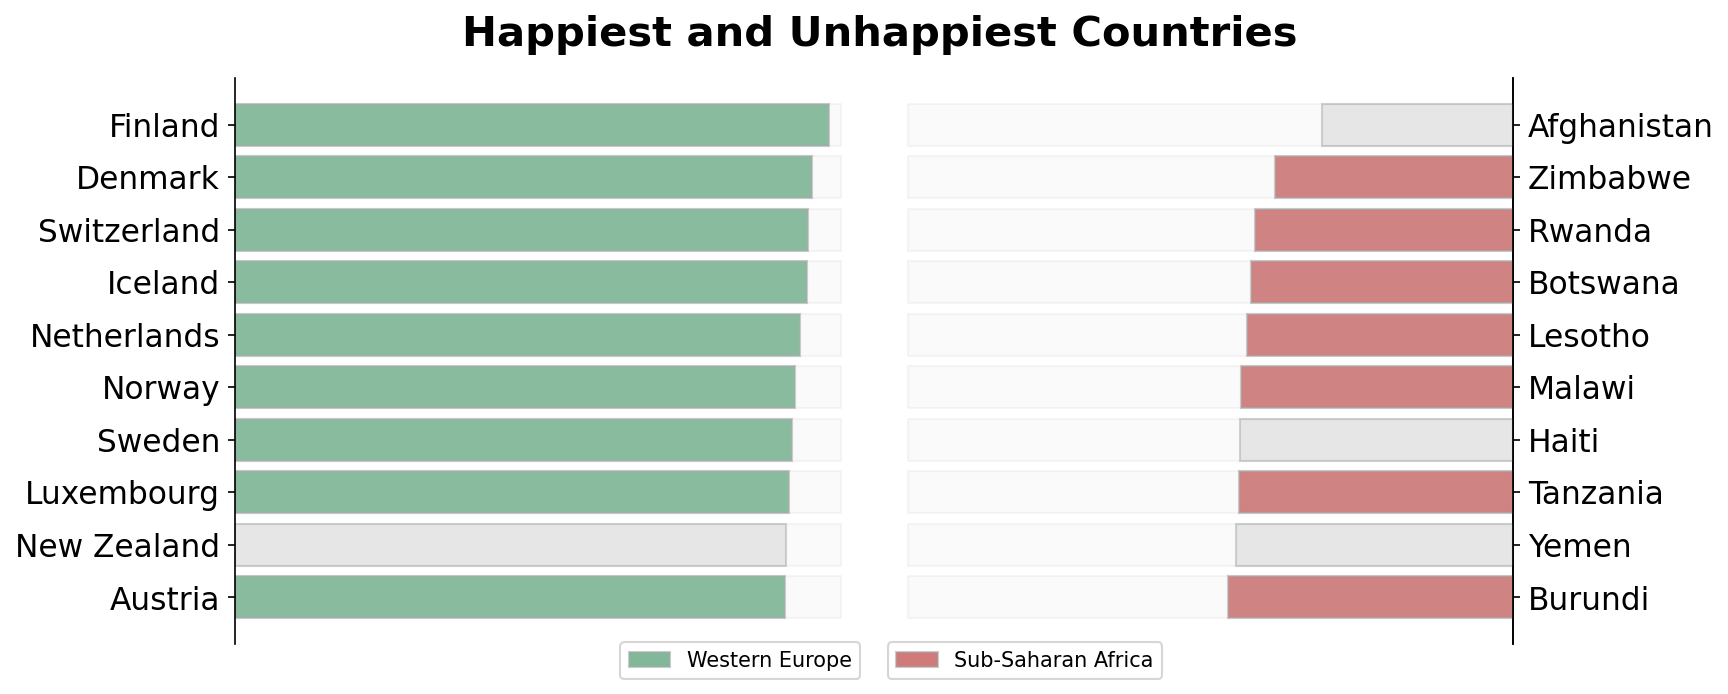

In [15]:
fig = plt.figure(figsize=(11,5), dpi=150) 
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.01, hspace=0.1)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

# firstly make bar charts of the 10 happiest countries and mark Western European countries with green.
countries = top10['Country Name']
scores = top10['Happiness Score']
y_index = np.arange(10)

ax0.barh(range(8), scores[:8], edgecolor='darkgray', color='seagreen', alpha=0.6)
ax0.barh(9, scores[9], edgecolor='darkgray', color='seagreen', alpha=0.6)
ax0.barh(y_index, 8, edgecolor='darkgray', color='lightgray', alpha=0.1)
ax0.barh(8, scores[8], edgecolor='darkgray', color='lightgray', alpha=0.5)
ax0.invert_yaxis()  
ax0.set_yticks(y_index)
ax0.set_yticklabels(countries, fontsize=15)
ax0.set_xticks([])
ax0.legend(['Western Europe'],loc='lower right',bbox_to_anchor = (1,-0.08))

# secondly make bar charts of the 10 unhappiest countries and mark Sub-Saharan African countries with red.
countries = low10['Country Name']
scores = low10['Happiness Score']

ax1.set_yticklabels([]) 
ax1.set_yticks([]) 
ax2 = ax1.twinx() 
ax2.barh(range(1,6), scores[1:6], edgecolor='darkgray', color='firebrick', alpha=0.6)
ax2.barh(7, scores[7], edgecolor='darkgray', color='firebrick', alpha=0.6)
ax2.barh(9, scores[9], edgecolor='darkgray', color='firebrick', alpha=0.6)
ax2.barh(y_index, 8, edgecolor='darkgray',color='lightgray',alpha=0.1)
ax2.barh(0, scores[0], edgecolor='darkgray', color='lightgray', alpha=0.5)
ax2.barh(6, scores[6], edgecolor='darkgray', color='lightgray', alpha=0.5)
ax2.barh(8, scores[8], edgecolor='darkgray', color='lightgray', alpha=0.5)
ax2.set_yticks(y_index)
ax2.set_yticklabels(countries, fontsize=15)
ax2.invert_xaxis()
ax2.invert_yaxis()
ax2.set_xticks([])
ax2.legend(['Sub-Saharan Africa'],loc='lower left',bbox_to_anchor = (0,-0.08))

for s in ['top', 'bottom', 'right']:
    ax0.spines[s].set_visible(False)
    
for s in ['top', 'bottom','left']:    
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

ax0.text(3,-1.5,'Happiest and Unhappiest Countries',fontsize=20,fontweight='bold')

# plt.savefig('happiest_countries.png', bbox_inches='tight')
plt.show()

9 of the happiest countries are in western Europe, and 7 of the unhappiest countries are in sub-Saharan Africa.

In [16]:
# in order to compute average happiness scores of all regions, I group the 2021 data set by the regional indicator, 
# and compute the mean happiness scores of all regions.
# I also sort the average scores by descending value.
region_scores = df_2021.groupby('Regional Indicator')['Happiness Score'].mean().sort_values(ascending=False)
region_scores

Regional Indicator
North America and ANZ                 7.128500
Western Europe                        6.914905
Central and Eastern Europe            5.984765
Latin America and Caribbean           5.908050
East Asia                             5.810333
Commonwealth of Independent States    5.467000
Southeast Asia                        5.407556
Middle East and North Africa          5.219765
Sub-Saharan Africa                    4.494472
South Asia                            4.441857
Name: Happiness Score, dtype: float64

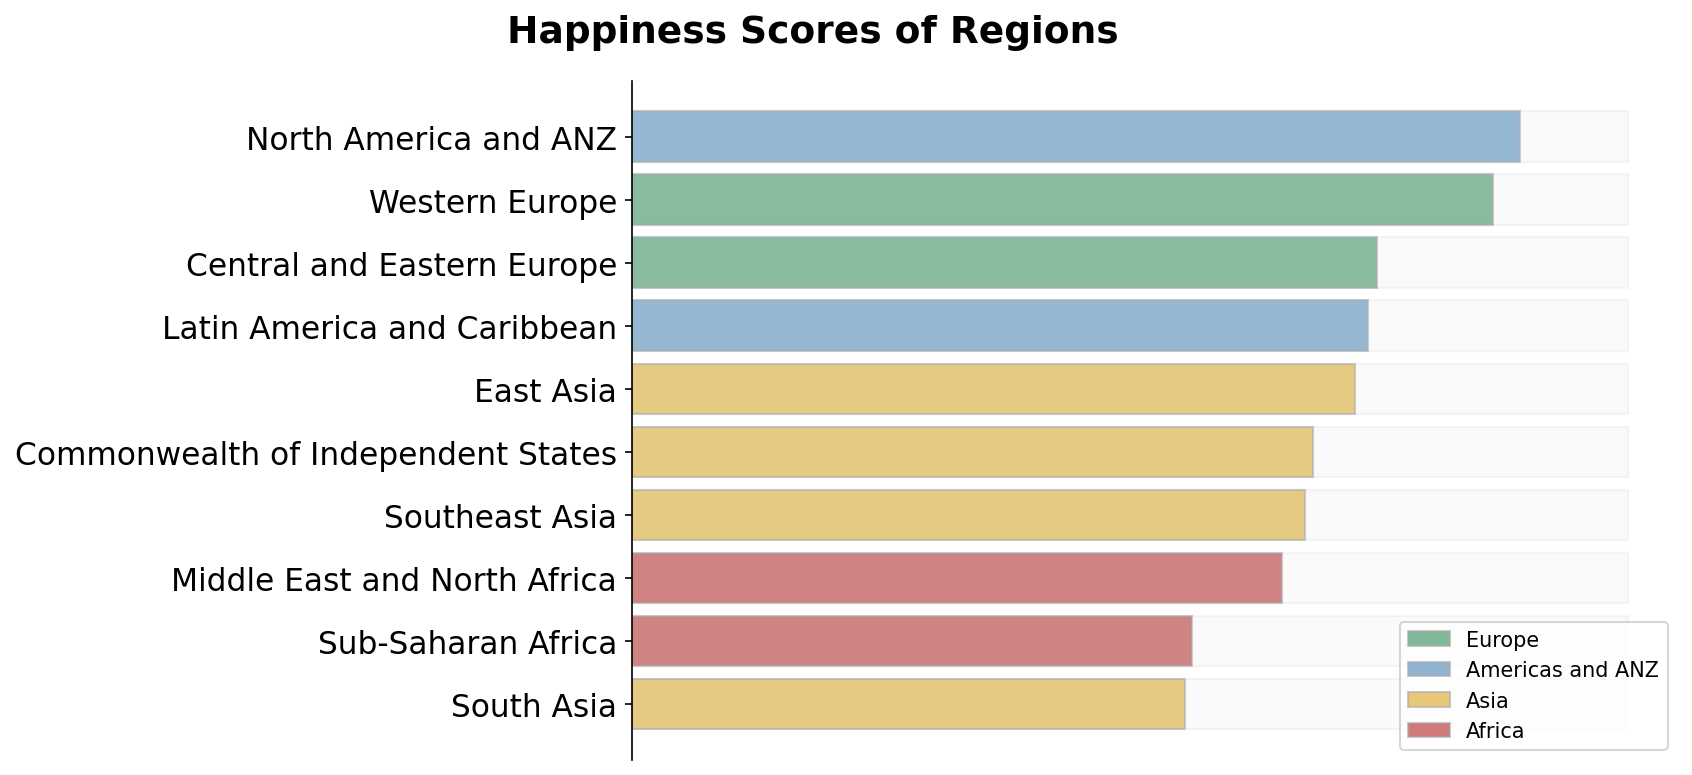

In [17]:
# make bar charts of regions' average happiness scores and mark European, American, Asian and African countries
# using different colors
fig = plt.figure(figsize=(9,6), dpi=150) 
ax = fig.add_subplot(1,1,1)

regions = region_scores.index
y_index = np.arange(10)

ax.barh(range(1,3), region_scores[1:3], edgecolor='darkgray', color='seagreen', alpha=0.6)
ax.barh([0,3], [region_scores[0],region_scores[3]], edgecolor='darkgray', color='steelblue', alpha=0.6)
ax.barh([4,5,6,9], [region_scores[4], region_scores[5], region_scores[6], region_scores[9]],
        edgecolor='darkgray', color='goldenrod', alpha=0.6)
ax.barh(range(7,9), region_scores[7:9], edgecolor='darkgray', color='firebrick', alpha=0.6)
ax.barh(y_index, 8, edgecolor='darkgray', color='lightgray', alpha=0.1)
ax.invert_yaxis()  
ax.set_yticks(y_index)
ax.set_yticklabels(regions, fontsize=15)
ax.set_xticks([])
ax.text(-1,-1.5,'Happiness Scores of Regions',fontsize=18,fontweight='bold')

plt.legend(['Europe','Americas and ANZ','Asia','Africa'],fontsize=10)

for s in ['top', 'bottom', 'right']:
    ax.spines[s].set_visible(False)
    
# plt.savefig('region_scores.png', bbox_inches='tight')
plt.show()

It looks like although 9 of the happiest countries are in western Europe, the region with the highest average happiness score is North America and ANZ. Moreover, although 7 of the unhappiest countries are in sub-Saharan Africa, the region with the lowest average happiness score is South Asia.

The more developed parts of the world, i.e., Europe, Americas and ANZ on average are happier than the less developed parts, i.e., Asia and Africa. This gives me the impression that the richer, the happier. We will see more about this in the next section.

### Question 2. What factors contribute to the happiness score?
I want to first create a heatmap of the correlation matrix to see how the columns are correlated. Then, I will plot two columns against each other and see how they are correlated.

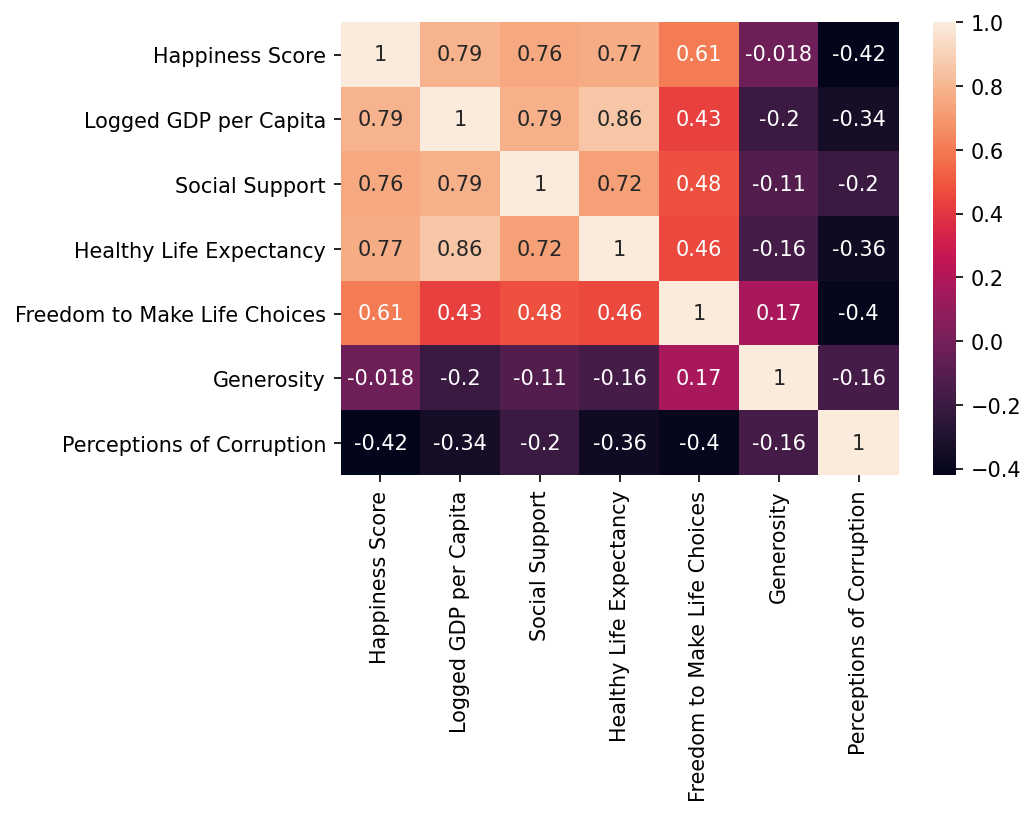

In [18]:
# plot correlation matrix
fig = plt.figure(figsize=(6,4), dpi=150)
ax = sns.heatmap(df_2021.corr(), annot = True)

# plt.savefig('corr.png', bbox_inches='tight')
plt.show()

The columns "Happiness Score", "Logged GDP per Capita", "Social Support" and "Healthy Life Expectancy" all have high and positive correlations with each other, suggesting that these values are likely to move in the same direction together. 

"Perceptions of Corruption", on the other hand, has a negative correlation with happiness, meaning happy countries tend to have low corruption perceptions.  

Among the columns, "Generosity" has the lowest correlations with the other columns.

In [19]:
# Next, I want to create scatter plots that showcase how happiess score is related to other columns.
# Before creating the scatter plots, I want to divide countries into 3 groups: 
# 1) Western Europe, North America and ANZ (happies two regions), 
# 2) Sub-Saharan Africa and South Asia (unhappiest two regions), and 3) other

def createNewColumn(df, column, newColumn, mapping):
    
    '''
    This function creates a new column in the dataframe whose values are based a column already in the df.
    
    INPUT:
        df - the pandas dataframe you want to add a column to
        column - name of the column already in df that the new column will be based on
        newColumn - name of the new column you want to create
        mapping - python dictionary which maps the values of column to values of newColumn
    OUTPUT:
        None, this function modifies the input dataframe in place
    '''
    
    df[newColumn] = ''
    for k,v in mapping.items():
        df.loc[df[column] == k, newColumn] = v
    
region_mapping = {'Western Europe': 'Western Europe, North America and ANZ',
                  'North America and ANZ': 'Western Europe, North America and ANZ',
                  'Sub-Saharan Africa': 'Sub-Saharan Africa and South Asia',
                  'South Asia': 'Sub-Saharan Africa and South Asia',
                  'Central and Eastern Europe': 'other',
                  'Latin America and Caribbean': 'other',
                  'East Asia': 'other',
                  'Southeast Asia': 'other',
                  'Commonwealth of Independent States': 'other',
                  'Middle East and North Africa': 'other'}

createNewColumn(df_2021, 'Regional Indicator', 'Region', region_mapping)
df_2021.head()    

,Country Name,Regional Indicator,Happiness Score,Logged GDP per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption,Region
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,"Western Europe, North America and ANZ"
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,"Western Europe, North America and ANZ"
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,"Western Europe, North America and ANZ"
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,"Western Europe, North America and ANZ"
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,"Western Europe, North America and ANZ"


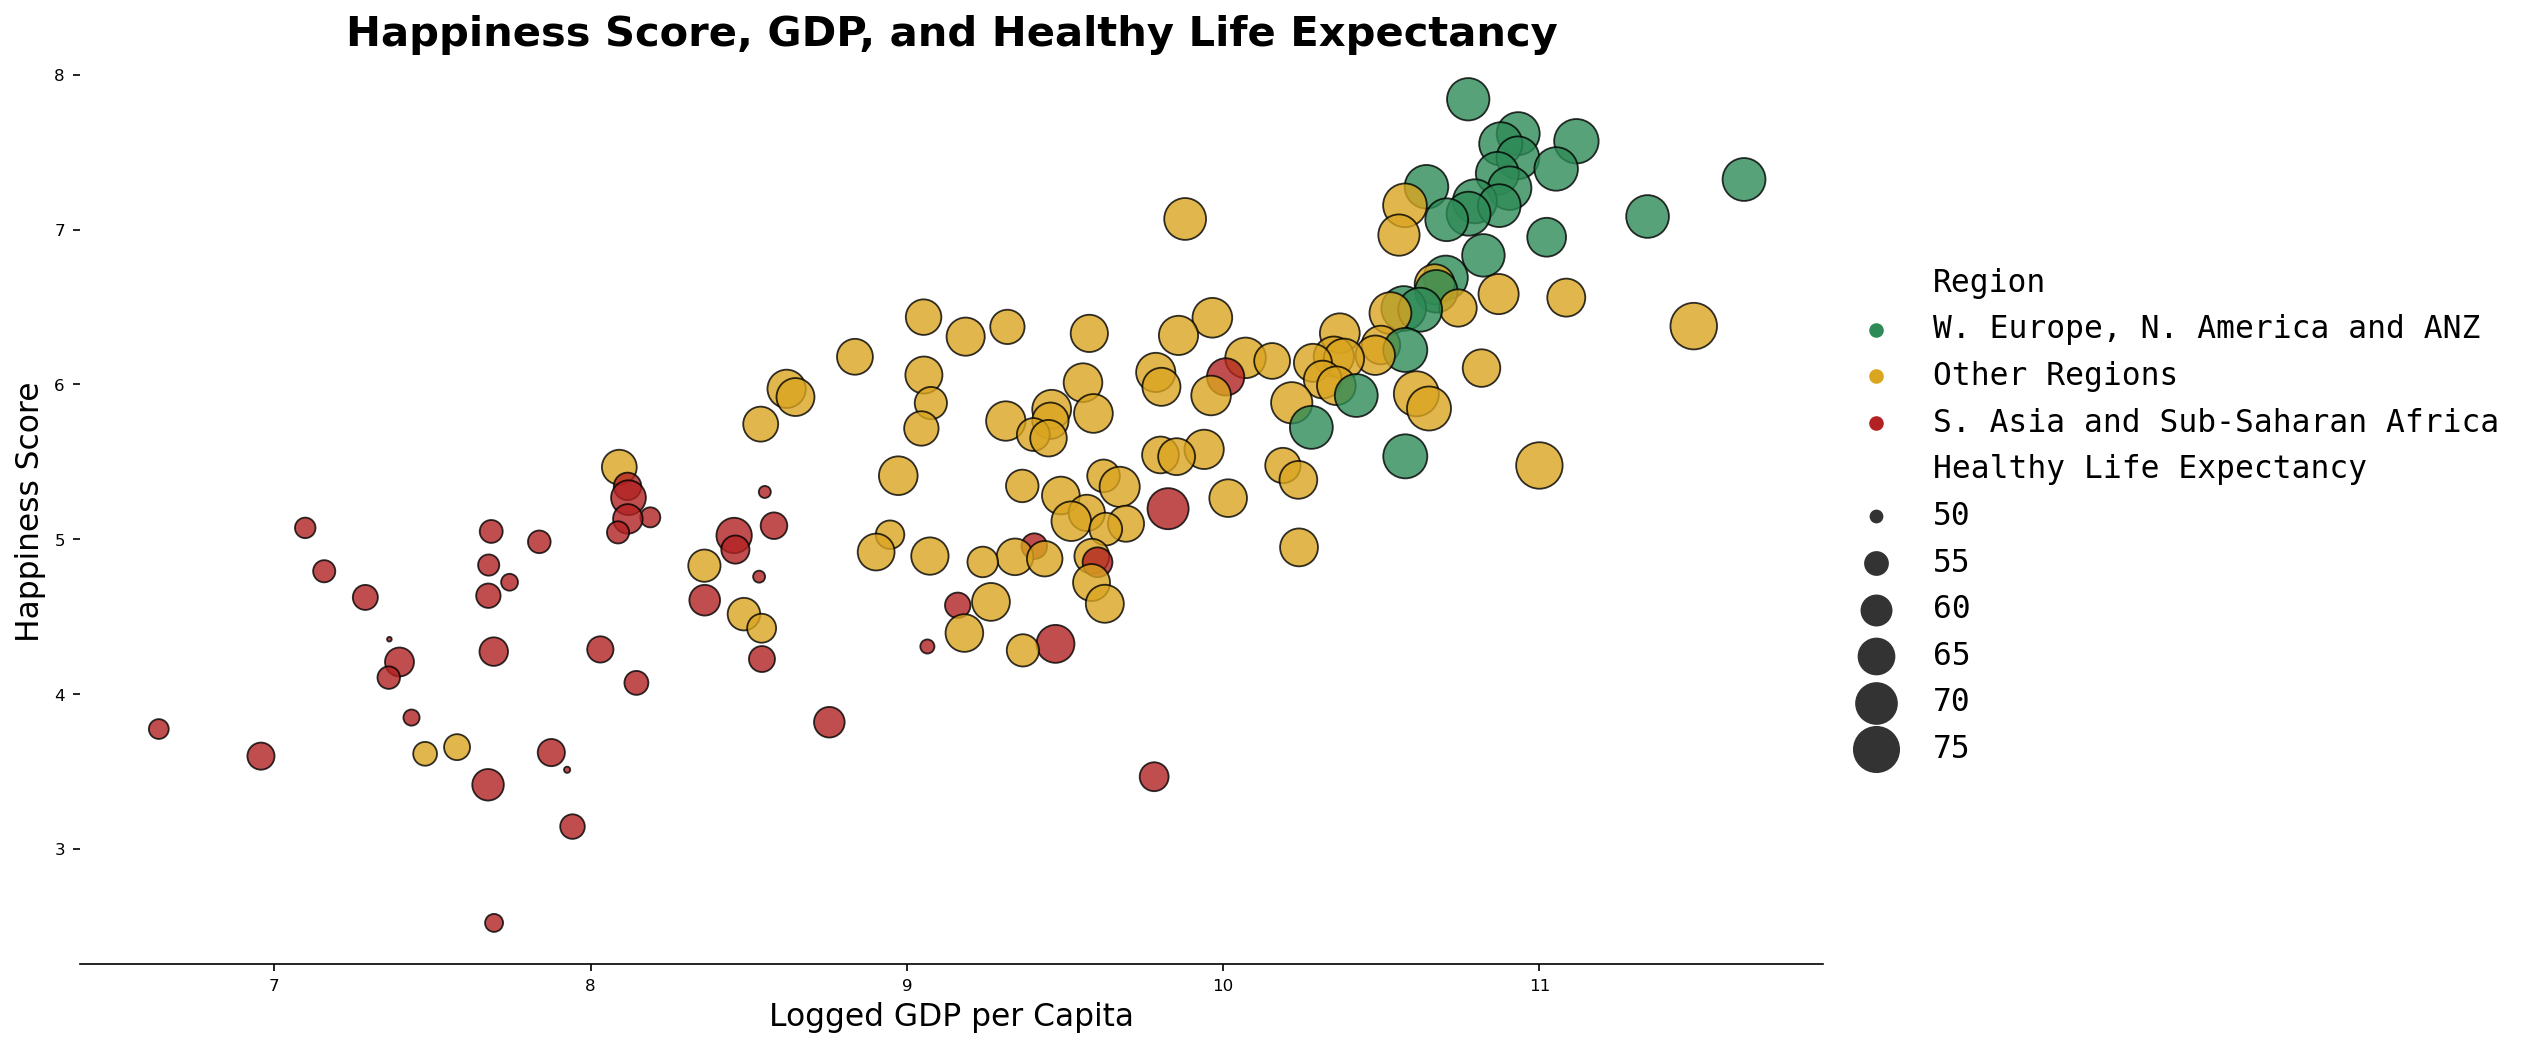

In [20]:
# create scatter plot of happiness score vs. GDP, where size of dots represents expected life expectancy
fig = plt.figure(figsize=(15,8), dpi=150) 
ax = fig.add_subplot(1,1,1)

sns.scatterplot(data = df_2021, x = 'Logged GDP per Capita', y = 'Happiness Score', hue = 'Region', 
                palette = ['seagreen', 'goldenrod', 'firebrick'], alpha=0.8, ec='black', 
                size = 'Healthy Life Expectancy', legend=True, sizes=(5, 500))
ax.set_xlabel('Logged GDP per Capita', fontsize = 15)
ax.set_ylabel('Happiness Score', fontsize = 15)
ax.tick_params(axis = 'both', which = 'major', labelsize = 8)

for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)
    
L = ax.legend(frameon=False, loc="upper center", bbox_to_anchor=(1.2, 0.8), fontsize = 15)
plt.setp(L.texts, family='monospace')
L.get_texts()[1].set_text('W. Europe, N. America and ANZ')
L.get_texts()[2].set_text('Other Regions')
L.get_texts()[3].set_text('S. Asia and Sub-Saharan Africa')

ax.set_title('Happiness Score, GDP, and Healthy Life Expectancy',fontsize=20,fontweight='bold')

# plt.savefig('happiness_gdp.png', bbox_inches='tight')
plt.show()

The plot reveals the positive relationship between happiness score and GDP, meaning that the richer the country, the happier the people. Also, the unhappiest countries marked in red dots have noticeably low healthy life expectancy compared to other countries, which suggests a positive correlation between life span, GDP and happiness.

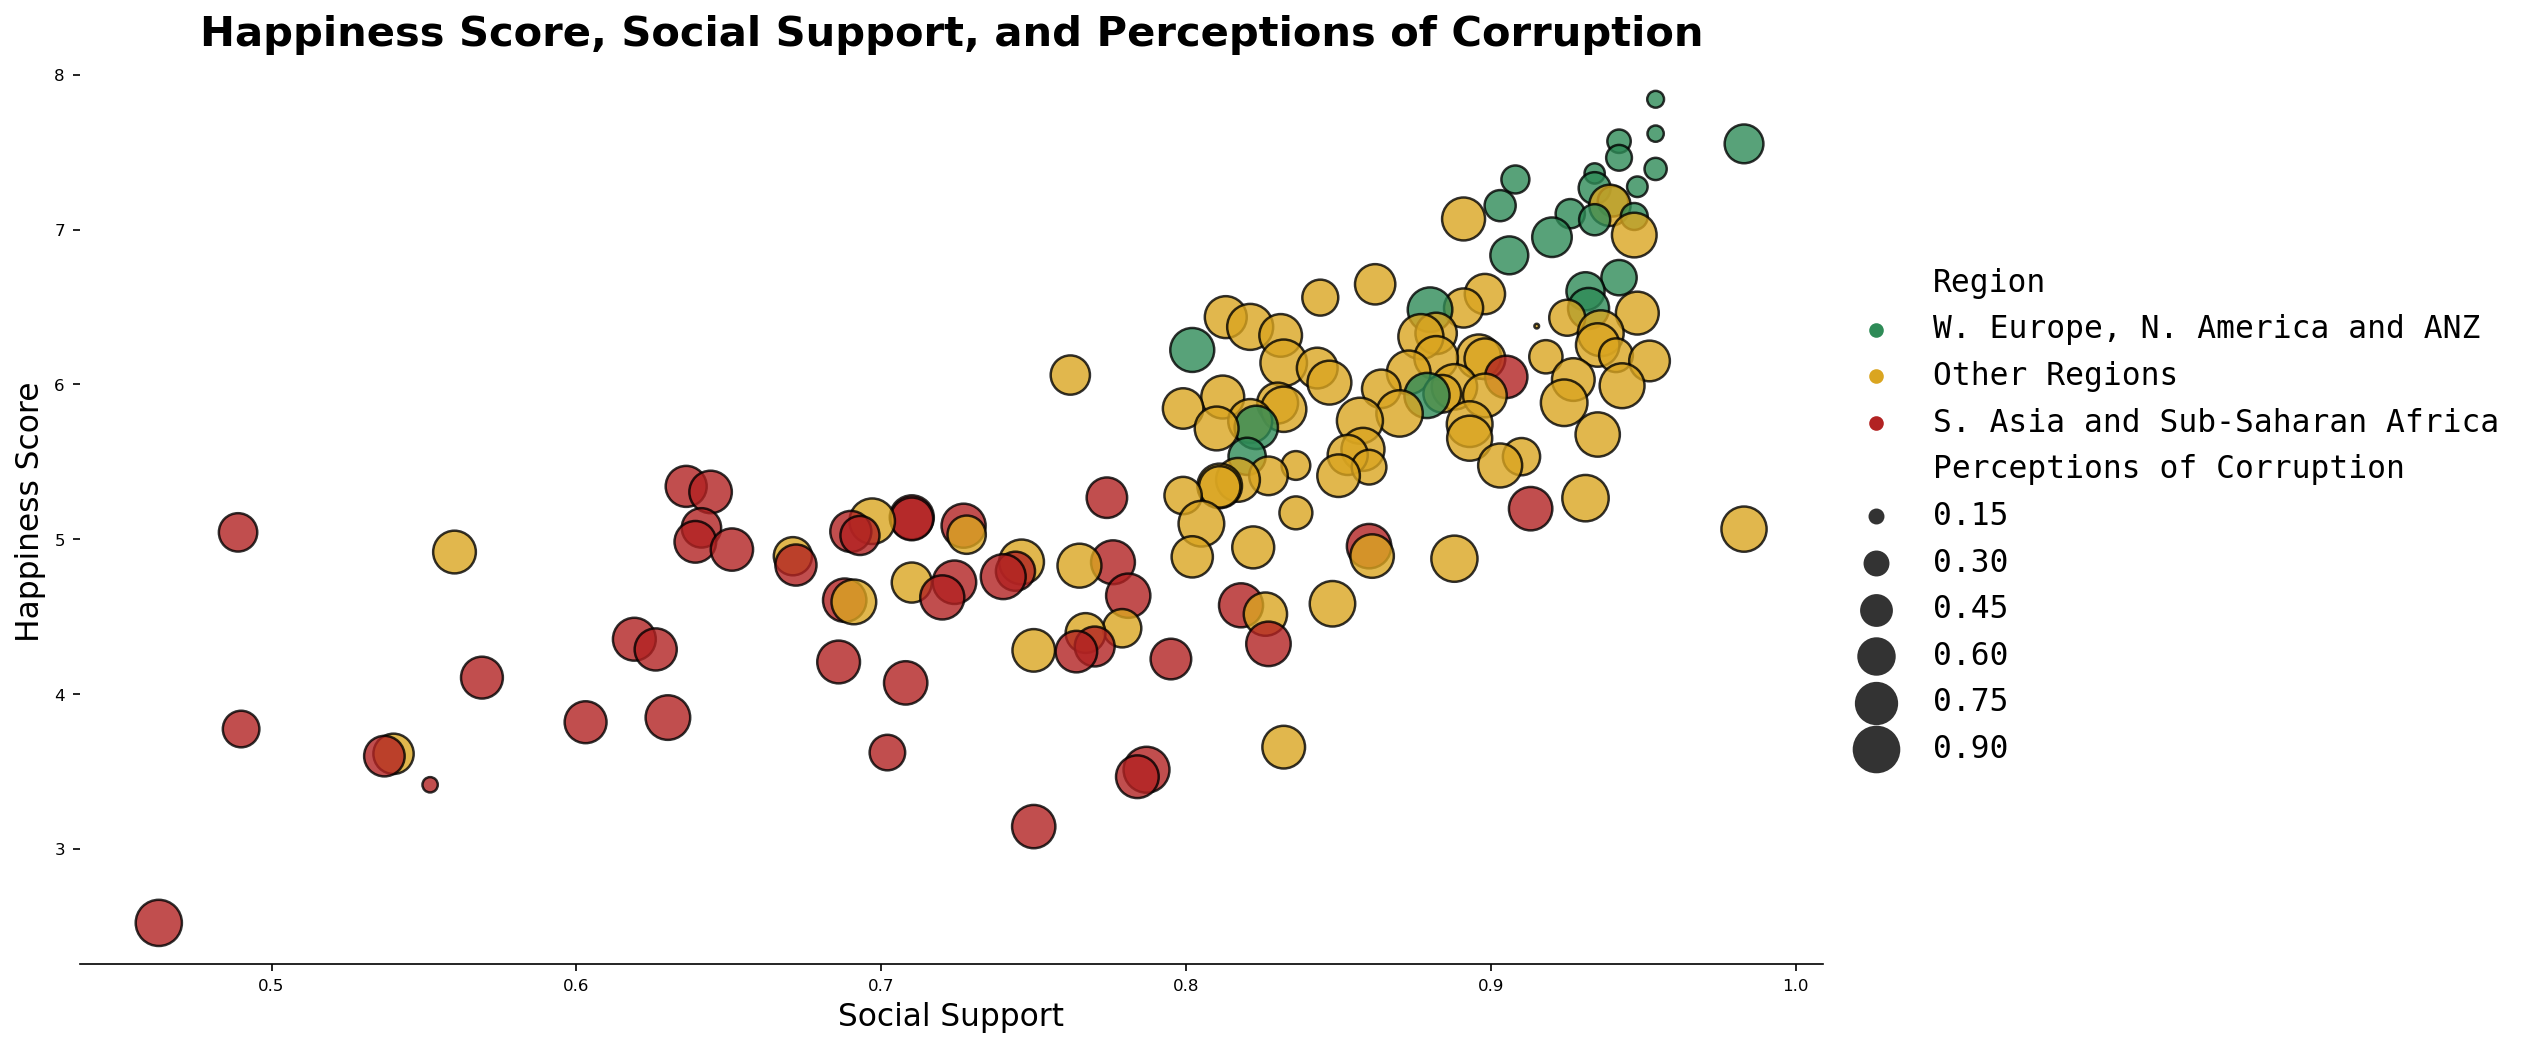

In [21]:
# create scatter plot of happiness score vs. social support, where size of dots represents perceptions of corruption
fig = plt.figure(figsize=(15,8), dpi=150) 
ax = fig.add_subplot(1,1,1)

sns.scatterplot(data = df_2021, x = 'Social Support', y = 'Happiness Score', hue = 'Region', 
                palette = ['seagreen', 'goldenrod', 'firebrick'], alpha=0.8, ec='black', 
                size = 'Perceptions of Corruption', legend=True, sizes=(5, 500))
ax.set_xlabel("Social Support", fontsize = 15)
ax.set_ylabel("Happiness Score", fontsize = 15)
ax.tick_params(axis = 'both', which = 'major', labelsize = 8)

for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)
    
L = ax.legend(frameon=False, loc="upper center", bbox_to_anchor=(1.2, 0.8), fontsize = 15)
plt.setp(L.texts, family='monospace')
L.get_texts()[1].set_text('W. Europe, N. America and ANZ')
L.get_texts()[2].set_text('Other Regions')
L.get_texts()[3].set_text('S. Asia and Sub-Saharan Africa')

ax.set_title('Happiness Score, Social Support, and Perceptions of Corruption',fontsize=20,fontweight='bold')

# plt.savefig('happiness_support.png', bbox_inches='tight')
plt.show()

This scatter plot tells us that a higher score of social support leads to high happiness level. Moreover, the countries with the highest happiness scores have noticeably low perceptions of corruptions.

### Question 3. Are the any changes over time?

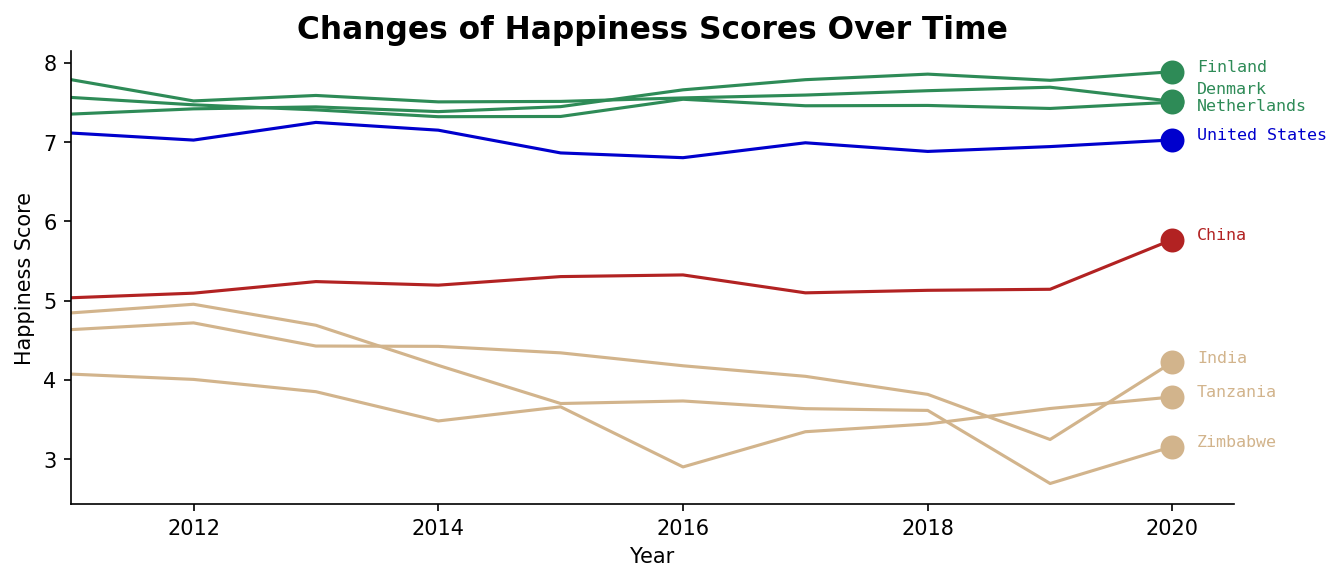

In [22]:
# plot historic happiness scores of 3 of the happiest countries, and 3 of the unhappiest countries. 
# historic happiness scores of United States and China are also plotted.
fig = plt.figure(figsize=(10, 4), dpi=150)
ax = fig.add_subplot(1,1,1)

low_color = 'tan'
top_color = 'seagreen'

sns.lineplot(data=df_hist[(df_hist['Country Name']=='United States')], x='Year', y='Happiness Score', 
             color='mediumblue')
ax.plot(2020,df_hist[(df_hist['Country Name']=='United States')]['Happiness Score'].reset_index().iloc[-1,-1],
        'ko', markersize=10, fillstyle='full', color='mediumblue', markeredgewidth=1.5)
ax.text(2020.2,df_hist[(df_hist['Country Name']=='United States')]['Happiness Score'].reset_index().iloc[-1,-1],
        'United States', color='mediumblue', fontfamily='monospace', fontsize=8, rotation=0)

sns.lineplot(data=df_hist[(df_hist['Country Name']=='China')], x='Year', y='Happiness Score',color='firebrick')
ax.plot(2020,df_hist[(df_hist['Country Name']=='China')]['Happiness Score'].reset_index().iloc[-1,-1], 'ko', 
        markersize=10, fillstyle='full', color='firebrick', markeredgewidth=1.5)
ax.text(2020.2,df_hist[(df_hist['Country Name']=='China')]['Happiness Score'].reset_index().iloc[-1,-1],'China', 
        color='firebrick', fontfamily='monospace', fontsize=8, rotation=0)

sns.lineplot(data=df_hist[(df_hist['Country Name']=='Zimbabwe')], x='Year', y='Happiness Score',color=low_color)
ax.plot(2020,df_hist[(df_hist['Country Name']=='Zimbabwe')]['Happiness Score'].reset_index().iloc[-1,-1], 
        'ko', markersize=10, fillstyle='full', color=low_color, markeredgewidth=1.5)
ax.text(2020.2,df_hist[(df_hist['Country Name']=='Zimbabwe')]['Happiness Score'].reset_index().iloc[-1,-1],
        'Zimbabwe', color=low_color, fontfamily='monospace', fontsize=8, rotation=0)

sns.lineplot(data=df_hist[(df_hist['Country Name']=='Tanzania')], x='Year', y='Happiness Score',color=low_color)
ax.plot(2020,df_hist[(df_hist['Country Name']=='Tanzania')]['Happiness Score'].reset_index().iloc[-1,-1], 
        'ko', markersize=10, fillstyle='full', color=low_color, markeredgewidth=1.5)
ax.text(2020.2,df_hist[(df_hist['Country Name']=='Tanzania')]['Happiness Score'].reset_index().iloc[-1,-1],
        'Tanzania', color=low_color, fontfamily='monospace', fontsize=8, rotation=0)

sns.lineplot(data=df_hist[(df_hist['Country Name']=='India')], x='Year', y='Happiness Score',color=low_color)
ax.plot(2020,df_hist[(df_hist['Country Name']=='India')]['Happiness Score'].reset_index().iloc[-1,-1], 
        'ko', markersize=10, fillstyle='full', color=low_color, markeredgewidth=1.5)
ax.text(2020.2,df_hist[(df_hist['Country Name']=='India')]['Happiness Score'].reset_index().iloc[-1,-1],
        'India', color=low_color, fontfamily='monospace', fontsize=8, rotation=0)

sns.lineplot(data=df_hist[(df_hist['Country Name']=='Finland')], x='Year', y='Happiness Score',color=top_color)
ax.plot(2020,df_hist[(df_hist['Country Name']=='Finland')]['Happiness Score'].reset_index().iloc[-1,-1], 
        'ko', markersize=10, fillstyle='full',color=top_color,markeredgewidth=1.5)
ax.text(2020.2,df_hist[(df_hist['Country Name']=='Finland')]['Happiness Score'].reset_index().iloc[-1,-1],
        'Finland', color=top_color, fontfamily='monospace', fontsize=8, rotation=0)

sns.lineplot(data=df_hist[(df_hist['Country Name']=='Denmark')], x='Year', y='Happiness Score',color=top_color)
ax.plot(2020,df_hist[(df_hist['Country Name']=='Denmark')]['Happiness Score'].reset_index().iloc[-1,-1], 
        'ko', markersize=10, fillstyle='full',color=top_color, markeredgewidth=1.5)
ax.text(2020.2,df_hist[(df_hist['Country Name']=='Denmark')]['Happiness Score'].reset_index().iloc[-1,-1]+0.1,
        'Denmark', color=top_color, fontfamily='monospace', fontsize=8, rotation=0)

sns.lineplot(data=df_hist[(df_hist['Country Name']=='Netherlands')], x='Year', y='Happiness Score',color=top_color)
ax.plot(2020,df_hist[(df_hist['Country Name']=='Netherlands')]['Happiness Score'].reset_index().iloc[-1,-1], 
        'ko', markersize=10, fillstyle='full',color=top_color, markeredgewidth=1.5)
ax.text(2020.2,df_hist[(df_hist['Country Name']=='Netherlands')]['Happiness Score'].reset_index().iloc[-1,-1]-0.1,
        'Netherlands', color=top_color, fontfamily='monospace', fontsize=8, rotation=0)

ax.set_xlim([2011,2020.5])
ax.set_title('Changes of Happiness Scores Over Time',fontsize=15,fontweight='bold')

for s in ['top','right']:
    ax.spines[s].set_visible(False)
    
# plt.savefig('changes_over_time.png', bbox_inches='tight')
plt.show()

The happiest countries have stable happiness scores over time, but there are a lot more fluctuations in the happiness scores of the unhappiest countries. It also seems that unhappy countries tend to become more unhappy. This is probably due to the widening economic inequality across the world.

As one of the most developed countries in the world, the US has a much higher happiness score than China (about 40% higher). The happiness score histories of the 2 countries are also stable over time. 